In [38]:
# Kütüphaneler

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.metrics import mean_squared_error , r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale     # standardizasoyon işlemleri
from sklearn.preprocessing import StandardScaler    # standardizasoyon işlemleri
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn import neighbors
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor


from warnings import filterwarnings
filterwarnings("ignore")     # önceki bölümlerde çalıştırdığımızda çıkan gereksiz uyarı mesajları çıkmasın diye

In [40]:
df = pd.read_csv("C:\python_py\Makine Öğrenmesi-2\Hitters.csv")
df = df.dropna()

dms = pd.get_dummies(df[["League" , "Division" , "NewLeague"]])

y = df["Salary"]

x__ = df.drop(["Salary" , "League" , "Division" , "NewLeague"] , axis=1).astype("float64")
x = pd.concat([x__ , dms[["League_N" , "Division_W" , "NewLeague_N"]]] , axis=1)

x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.25 , random_state=42)

In [41]:
# Yeni olarak ağaca dayalı bir algoritmaya geçtiğimiz için iki değişken üzerinden işlem yapacağız. Bu değişkenler üzerinden anlamaya çalışalım.

x_train = pd.DataFrame(x_train["Hits"])
x_test = pd.DataFrame(x_test["Hits"])

# MODEL

In [42]:
cart_model = DecisionTreeRegressor().fit(x_train , y_train)

Text(0, 0.5, 'Maaş (Salary)')

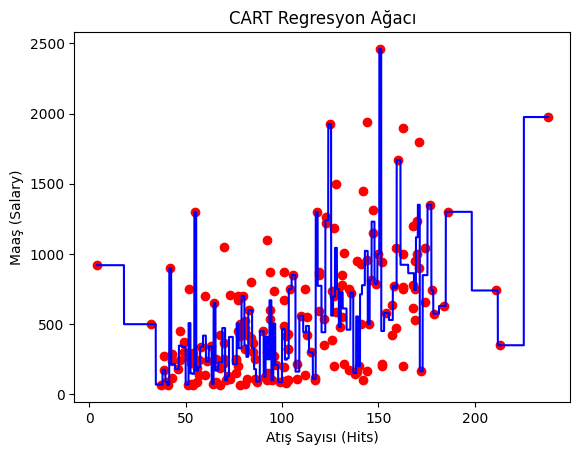

In [43]:
# Görsel olarak arka taraftaki ağaç yapısının nasıl olduğuna göz atalım

x_grid = np.arange(min(np.array(x_train)) , max(np.array(x_train)) , 0.01)
x_grid = x_grid.reshape((len(x_grid)) , 1)

plt.scatter(x_train , y_train , color="red")

plt.plot(x_grid , cart_model.predict(x_grid) , color="blue")

plt.title("CART Regresyon Ağacı")
plt.xlabel("Atış Sayısı (Hits)")
plt.ylabel("Maaş (Salary)")

# TAHMİN

In [44]:
cart_model.predict(x_test)[0:5]

array([ 725.    , 1230.    ,  725.    ,  504.1665,   67.5   ])

In [33]:
# Test setinin TEK DEĞİŞKENLİ (Hits) ilk hata oranına bakalım
"""
y_pred = cart_model.predict(x_test)

RMSE = np.sqrt(mean_squared_error(y_test , y_pred))
RMSE 
"""

468.49579052913884

In [46]:
# Test setinin TÜM DEĞİŞKENLİ ilk hata oranına bakalım

df = pd.read_csv("C:\python_py\Makine Öğrenmesi-2\Hitters.csv")
df = df.dropna()

dms = pd.get_dummies(df[["League" , "Division" , "NewLeague"]])

y = df["Salary"]

x__ = df.drop(["Salary" , "League" , "Division" , "NewLeague"] , axis=1).astype("float64")
x = pd.concat([x__ , dms[["League_N" , "Division_W" , "NewLeague_N"]]] , axis=1)

x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.25 , random_state=42)

cart_model = DecisionTreeRegressor().fit(x_train , y_train)

y_pred = cart_model.predict(x_test)

RMSE = np.sqrt(mean_squared_error(y_test , y_pred))
RMSE


465.7854115476256

Görüldüğü üzere yeni değişkenler eklendikçe daha başarılı tahmin elde edilebiliyor.

# MODEL TUNING (DOĞRULAMA)

In [20]:
# CART'ın hiperparametrelerini text editor üzerinden inceledik.

?cart_model

Type:        DecisionTreeRegressor
String form: DecisionTreeRegressor()
File:        c:\users\bedirhan örseloğlu\appdata\local\packages\pythonsoftwarefoundation.python.3.11_qbz5n2kfra8p0\localcache\local-packages\python311\site-packages\sklearn\tree\_classes.py
Docstring:  
A decision tree regressor.

Read more in the :ref:`User Guide <tree>`.

Parameters
----------
criterion : {"squared_error", "friedman_mse", "absolute_error",             "poisson"}, default="squared_error"
    The function to measure the quality of a split. Supported criteria
    are "squared_error" for the mean squared error, which is equal to
    variance reduction as feature selection criterion and minimizes the L2
    loss using the mean of each terminal node, "friedman_mse", which uses
    mean squared error with Friedman's improvement score for potential
    splits, "absolute_error" for the mean absolute error, which minimizes
    the L1 loss using the median of each terminal node, and "poisson" which
    uses

In [53]:
cart_params = {"max_depth":[2 , 3 , 4 , 5 , 10 , 20] , "min_samples_split":[2 , 10 , 5 , 30 , 50 , 100]}
# en önemli parametre min_samples_split !!!!!!!!!!!!!!!

cart_model = DecisionTreeRegressor()
cart_cv_model = GridSearchCV(cart_model , cart_params , cv=10).fit(x_train , y_train)

In [54]:
cart_cv_model.best_params_

{'max_depth': 4, 'min_samples_split': 50}

In [51]:
# FİNAL MODELİ

cart_model_tuned = DecisionTreeRegressor(max_depth=4 , min_samples_split=50).fit(x_train , y_train)

In [52]:
# Test setimizin son hata oranı

y_pred = cart_model_tuned.predict(x_test)

RMSE = np.sqrt(mean_squared_error(y_pred , y_test))
RMSE

# İlk hata oranımız 465.7854115476256'idi

411.9886403043614